# Assignment 7

### MACS 30150, Dr. Evans
### Zhou Xing

problem1 (a)

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import LeaveOneOut
import numpy as np
import pandas as pd

/opt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data/strongdrink.txt')
df.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df["cultivar"]

X_train, X_test, y_train, y_test = \
  train_test_split(X, y, test_size = 0.25,random_state=20)

clf = LogisticRegression(solver='lbfgs', \
        multi_class='multinomial').fit(X_train, y_train)

pd.DataFrame({'Variables':["beta_0","beta_1",'beta_2','beta_3','beta_4'],
              "j=1":np.append(clf.intercept_[0],clf.coef_[0]),
              "j=2":np.append(clf.intercept_[1],clf.coef_[1])})

,Variables,j=1,j=2
0,beta_0,-24.027617,22.780733
1,beta_1,1.701734,-1.466297
2,beta_2,-0.265788,-0.332951
3,beta_3,1.224101,0.663556
4,beta_4,0.022507,-0.922682


In [4]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



In [5]:
df["cultivar"].value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

The error rates are 13%, 0%, and 0% for group 1,2, and 3, respectively.  
From the classification report, we can see that the model is best at predicting the third group with the highest f1-score. And the third group is not the one with the most observations(Group 2).

In [6]:
mean_squared_err = mean_squared_error(y_test, y_pred)
print("Mean squared error is {}".format(mean_squared_err))

Mean squared error is 0.045454545454545456


## (b)

In [7]:
Xvars = df[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = df['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)

MSE_vec = np.zeros(N_loo)
ytest = np.zeros(N_loo)
ypred = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    ytest[test_index] = y_test
    
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred
    if y_pred == ytest[test_index]:
        MSE_vec[test_index] = 0
    else:
        MSE_vec[test_index] = 1
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE for test set [0]  is [0.]
MSE for test set [1]  is [0.]
MSE for test set [2]  is [0.]
MSE for test set [3]  is [0.]
MSE for test set [4]  is [0.]
MSE for test set [5]  is [0.]
MSE for test set [6]  is [0.]
MSE for test set [7]  is [0.]
MSE for test set [8]  is [0.]
MSE for test set [9]  is [0.]
MSE for test set [10]  is [0.]
MSE for test set [11]  is [1.]
MSE for test set [12]  is [0.]
MSE for test set [13]  is [0.]
MSE for test set [14]  is [0.]
MSE for test set [15]  is [0.]
MSE for test set [16]  is [0.]
MSE for test set [17]  is [0.]
MSE for test set [18]  is [0.]
MSE for test set [19]  is [0.]
MSE for test set [20]  is [0.]
MSE for test set [21]  is [1.]
MSE for test set [22]  is [1.]
MSE for test set [23]  is [1.]
MSE for test set [24]  is [1.]
MSE for test set [25]  is [1.]
MSE for test set [26]  is [0.]
MSE for test set [27]  is [1.]
MSE for test set [28]  is [0.]
MSE for test set [29]  is [0.]
MSE for test set [30]  is [0.]
MSE for test set [31]  is [0.]
MSE for test set [

In [8]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      '\ntest estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.13636363636363635 
test estimate MSE standard err= 0.3431742925123068


In [9]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

        1.0       0.84      0.78      0.81        59
        2.0       0.83      0.89      0.86        71
        3.0       0.96      0.93      0.95        46

avg / total       0.86      0.86      0.86       176



The error rates are 16%, 17%, and 4% for group 1,2, and 3, respectively. The error rates increase as compared with part (a) for all of the three groups.

(c)

In [10]:
from sklearn.model_selection import KFold
k = 4
kf = KFold(k, random_state=10, shuffle=True)
kf.get_n_splits(Xvars)

MSE_vec_kf = np.zeros(k)

ytest = np.zeros(N_loo)
ypred = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    ytest[test_index] = y_test

    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    ypred[test_index] = y_pred

    n = len(y_pred)
    err=[1 if y_test[i] != y_pred[i] else 0 for i in range(n)]  
    MSE_vec_kf[k_ind]=np.mean(err)
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE for test set 0  is 0.22727272727272727
MSE for test set 1  is 0.22727272727272727
MSE for test set 2  is 0.13636363636363635
MSE for test set 3  is 0.09090909090909091


In [11]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      '\ntest estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.17045454545454544 
test estimate MSE standard err= 0.05904718662166627


In [12]:
print(classification_report(ytest, ypred))

             precision    recall  f1-score   support

        1.0       0.78      0.73      0.75        59
        2.0       0.79      0.85      0.82        71
        3.0       0.96      0.93      0.95        46

avg / total       0.83      0.83      0.83       176



The error rates are 22%, 21%, and 4% for group 1,2, and 3, respectively. The error rates increase as compared with part (b) for group 1 and 2. The error rate for group 3 does not change compared to part (b), but still larger than part (a).

## problem2 (a)

In [13]:
df2=pd.read_csv("data/CoolIndex.txt",names=["Age","Cool"])
df2.head()

,Age,Cool
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


In [14]:
import matplotlib.pyplot as plt
plt.scatter(df2['Age'],df2['Cool'],alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.show()

<Figure size 640x480 with 1 Axes>

(b)

In [15]:
import statsmodels.api as sm

df2["g1"]=np.where((df2.Age>=11) & (df2.Age<22),1,0)
df2["g2"]=np.where((df2.Age>=22) & (df2.Age<40),1,0)
df2["g3"]=np.where((df2.Age>=40) & (df2.Age<59),1,0)
df2["g4"]=np.where((df2.Age>=59) & (df2.Age<77),1,0)
df2["g5"]=np.where((df2.Age>=77) & (df2.Age<=95),1,0)

X=df2[["g1","g2","g3","g4","g5"]]
res=sm.OLS(df2.Cool,X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cool   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     178.7
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          3.73e-114
Time:                        16:21:19   Log-Likelihood:                -3214.5
No. Observations:                 956   AIC:                             6439.
Df Residuals:                     951   BIC:                             6463.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
g1            20.1025      0.562     35.746      0.0

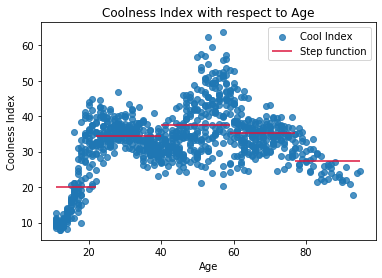

In [16]:
values = [20.1025, 34.4758, 37.6351, 35.2254, 27.2964]
plt.scatter(df2['Age'],df2['Cool'], alpha=0.8,label='Cool Index')
x_min = np.array([11, 22, 40, 59, 77])
x_max = np.array([22, 40, 59, 77, 95])
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()

From the OLS regression results above, the estimated step function values for each bin are 20.1025, 34.4758, 37.6351, 35.2254,  27.2964 respectively.

In [17]:
res.predict([0,0,0,1,0])

array([35.22540004])

The predicted coolness of a 73-year old from the stepwise function is 35.2254.

(c)

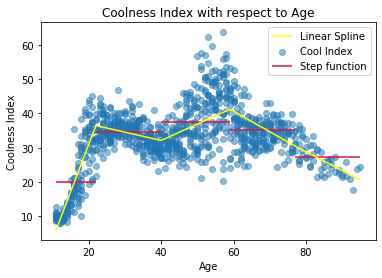

In [18]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22,40,59,77])
df2.sort_index(0, ascending=True, inplace=True)
group = df2.groupby('Age', as_index = False).mean()
usl = LSQUnivariateSpline(group.Age.values, group.Cool.values, t, k=1)
age2 = np.linspace(11,95,100)

plt.scatter(df2['Age'],df2['Cool'], alpha=0.5,label='Cool Index')
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.plot(age2, usl(age2), color='yellow', label='Linear Spline')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()

In [19]:
print('The predicted coolness index of a 73-year-old \
\nperson from the linear spline is', usl(73))

The predicted coolness index of a 73-year-old 
person from the linear spline is 32.86784862349653


(d)

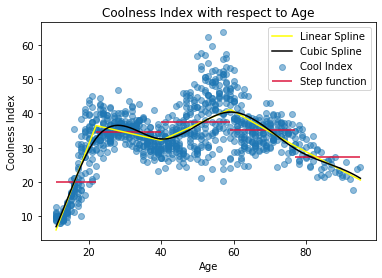

In [20]:
usl2 = LSQUnivariateSpline(group.Age.values, group.Cool.values, t, k=3)

plt.scatter(df2['Age'],df2['Cool'], alpha=0.5,label='Cool Index')
plt.hlines(values, x_min, x_max, color='crimson', label='Step function')
plt.plot(age2, usl(age2), color='yellow', label='Linear Spline')
plt.plot(age2, usl2(age2), 'k-', label='Cubic Spline')
plt.xlabel("Age")
plt.ylabel("Coolness Index")
plt.title("Coolness Index with respect to Age")
plt.legend()
plt.show()

In [21]:
pred_coolness3 = usl2(73)
print("The predicted coolness of a 73-year old from the cubic spline is {}.".format(pred_coolness3))

The predicted coolness of a 73-year old from the cubic spline is 32.642301066279764.
